### Importer les packages

In [1]:
import pyforest
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

### Importer les données

In [70]:
Data = pd.read_csv('Data_Urb_Agr_For.csv')
Data.head()

<IPython.core.display.Javascript object>

,TU,SA,SP,Risque déforestation
0,20.82,64183.42,15.39,0
1,17.17,209091.80,1397.22,1
2,16.86,154372.00,1787.63,1
3,16.20,273193.50,0.19,0
4,15.12,209091.80,1397.22,1


### Exploration des données 

In [71]:
pd.set_option("display.float", "{:.2f}".format)
Data.describe()

<IPython.core.display.Javascript object>

,TU,SA,SP,Risque déforestation
count,250.00,250.00,250.00,250.00
mean,23.64,140950.96,1113.02,0.56
std,10.95,72899.50,1466.91,0.50
min,7.51,14960.55,0.07,0.00
25%,15.41,65325.00,0.85,0.00
50%,21.39,164348.50,843.65,1.00
75%,29.55,209091.80,1397.22,1.00
max,48.70,398980.00,12172.03,1.00


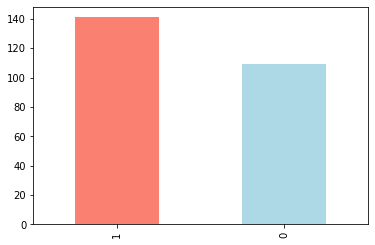

In [72]:
Data['Risque déforestation'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [73]:
Data.isna().sum()

TU                      0
SA                      0
SP                      0
Risque déforestation    0
dtype: int64

### Matrice de corrélation 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(4.5, -0.5)

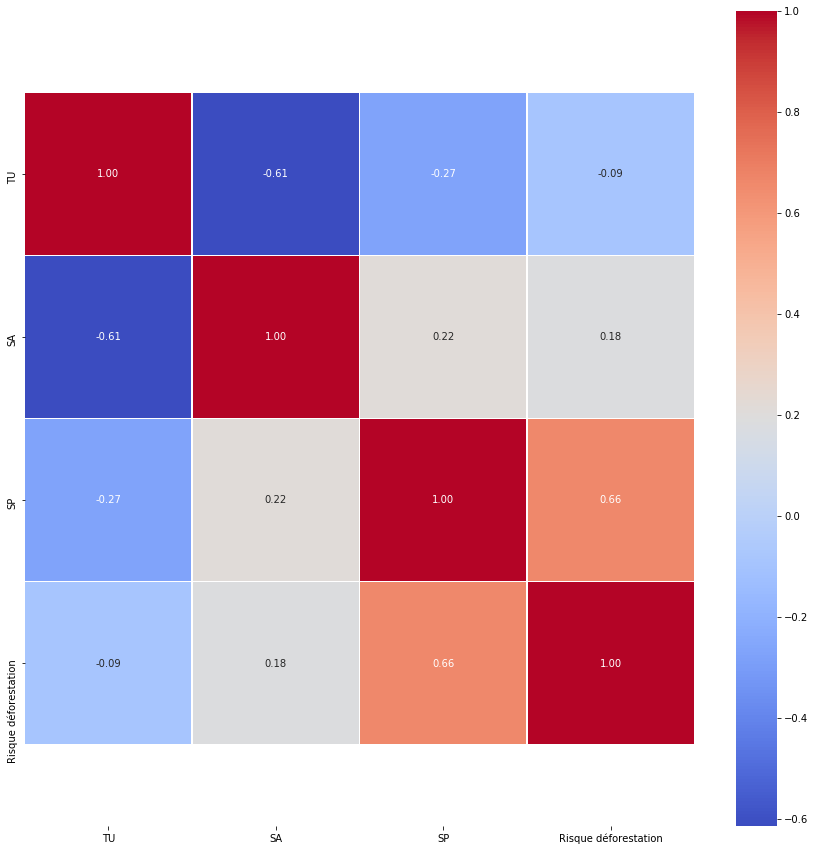

In [74]:
# Let's make our correlation matrix a little prettier
corr_matrix = Data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="coolwarm");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

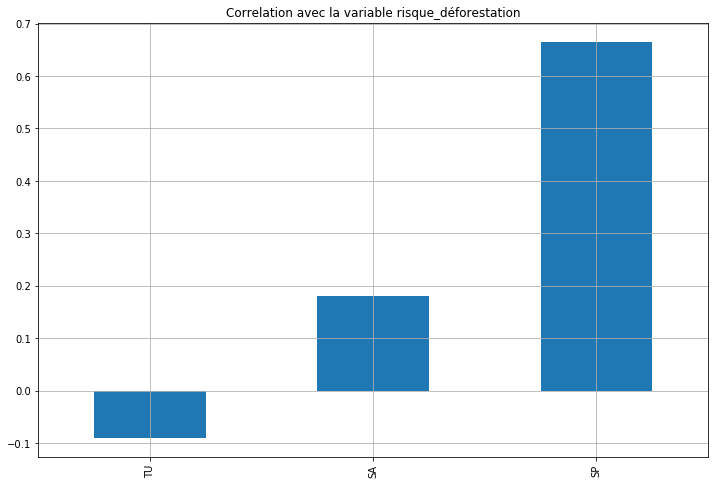

In [75]:
Data.drop('Risque déforestation', axis=1).corrwith(Data['Risque déforestation']).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation avec la variable risque_déforestation")

##### Commentaires

- On voit les variables 'Superficie Agricole' et 'Superficie Perdue' sont plus correlées avec la variable 'Risque déforestation' que la variable 'Taux d'urbanisation'. 

### Transformation des données 

In [76]:
X = Data.drop(['Risque déforestation'], axis  = 1 ) 
y = Data['Risque déforestation']

In [77]:
# from sklearn.preprocessing import StandardScaler
# s_sc = StandardScaler()
# X = s_sc.fit_transform(X)

### Fractionner les données 

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<IPython.core.display.Javascript object>

### Application de la méthode Random  Forest sur les données

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
#         clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
#         print("_______________________________________________")
#         print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
#         clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
#         print("_______________________________________________")
#         print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

##### Trouver les paramètres optimaux

In [80]:
rfc =RandomForestClassifier(random_state=0)

<IPython.core.display.Javascript object>

In [81]:
param_grid = { 
    'n_estimators': [100, 200,300,400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [82]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 4)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [83]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 100}

##### Application du modèle avec les paramètres optimaux obtenus

In [86]:
rfc1=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 100, 
                            max_depth=1, criterion='gini')
rfc1.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [87]:
print_score(rfc1, X_train, y_train, X_test, y_test, train=True)
print_score(rfc1, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.14%
_______________________________________________
Confusion Matrix: 
 [[75  0]
 [ 5 95]]

Test Result:
Accuracy Score: 94.67%
_______________________________________________
Confusion Matrix: 
 [[34  0]
 [ 4 37]]



##### Prédiction

In [88]:
def Prédiction(Value): 
    if Value == [1]: 
        print('PREDICTION : \n La région est fortement menacée par la déforestation')
    else:
        print('PREDICTION : \n La région est faiblement menacée par la déforestation')

In [90]:
Value = rfc1.predict([[48,149560.550000, 30.725322]])
Prédiction(Value)

PREDICTION : 
 La région est faiblement menacée par la déforestation
